IMPORTING NECCESSARY LIBRARIES

In [59]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

FUNCTION TO GET THE FILE PATHS IN A LIST FORM

In [60]:
def get_file_paths(folder_path):
  file_paths = []
  for filename in os.listdir(folder_path):
    full_path = os.path.join(folder_path, filename)
    if os.path.isfile(full_path):
      file_paths.append(full_path)
  return file_paths

#replace folder_path with your path
folder_path = "/users/myfiles/dataset_folder"

stock_list_file_paths = get_file_paths(folder_path)

CALCULATING ERROR IN THE DIFFERENT REGRESSION AND CLASSIFICATION MODELS

In [ ]:
lr_rmses = []
rf_maes = []
rf_rmses = []

for file in stock_list_file_paths:
    # Reading data
    data = pd.read_csv(file)
    
    if data.empty:
        print(f"Dataset {file} is empty. Skipping...")
        continue

    # Split dataset into features and target
    X = data.drop(columns=['Date', 'Symbol', 'Series', 'Close'])  # Features
    y = data['Close']  # Target
    
    if len(X) == 0 or len(y) == 0:
        print(f"Dataset {file} does not contain enough data. Skipping...")
        continue

    # Data split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Handle missing values
    X_train.fillna(0, inplace=True)
    X_test.fillna(0, inplace=True)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model Development
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)

    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)

    # Model evaluation parameters
    lr_pred = lr_model.predict(X_test_scaled)
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)

    rf_pred = rf_model.predict(X_test_scaled)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

    # Metrics and company name
    print(f"Company: {file}")
    print(f"Linear Regression MAE: {lr_mae:.2f}, RMSE: {lr_rmse:.2f}")
    print(f"Random Forest MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")
    print()

    # Storing model performance metrics
    lr_maes.append(lr_mae)
    lr_rmses.append(lr_rmse)
    rf_maes.append(rf_mae)
    rf_rmses.append(rf_rmse)

# Visualize model performance across companies
plt.figure(figsize=(10, 6))
plt.plot(lr_maes, label='Linear Regression MAE', marker='o')
plt.plot(lr_rmses, label='Linear Regression RMSE', marker='o')
plt.plot(rf_maes, label='Random Forest MAE', marker='o')
plt.plot(rf_rmses, label='Random Forest RMSE', marker='o')
plt.xlabel('Company')
plt.ylabel('Performance')
plt.title('Model Performance Across Companies')
plt.xticks(ticks=range(len(stock_list_file_paths)), labels=range(1, len(stock_list_file_paths)+1))
plt.legend()
plt.grid(True)
plt.show()

FROM THE ABOVE WE CAN SEE THAT LINEAR REGRESSION IS BETTER THAN RANDOM FOREST

paint
Predicted Stock Prices:
2021-05-01: 1247.404808660978
2021-05-02: 1247.404808660978
2021-05-03: 1247.404808660978
2021-05-04: 1247.404808660978
2021-05-05: 1247.404808660978
2021-05-06: 1247.404808660978
2021-05-07: 1247.404808660978
2021-05-08: 1247.404808660978
2021-05-09: 1247.404808660978
2021-05-10: 1247.404808660978
2021-05-11: 1247.404808660978
2021-05-12: 1247.404808660978
2021-05-13: 1247.404808660978
2021-05-14: 1247.404808660978
2021-05-15: 1247.404808660978
2021-05-16: 1247.404808660978
2021-05-17: 1247.404808660978
2021-05-18: 1247.404808660978
2021-05-19: 1247.404808660978
2021-05-20: 1247.404808660978
2021-05-21: 1247.404808660978
2021-05-22: 1247.404808660978
2021-05-23: 1247.404808660978
2021-05-24: 1247.404808660978
2021-05-25: 1247.404808660978
2021-05-26: 1247.404808660978
2021-05-27: 1247.404808660978
2021-05-28: 1247.404808660978
2021-05-29: 1247.404808660978
2021-05-30: 1247.404808660978


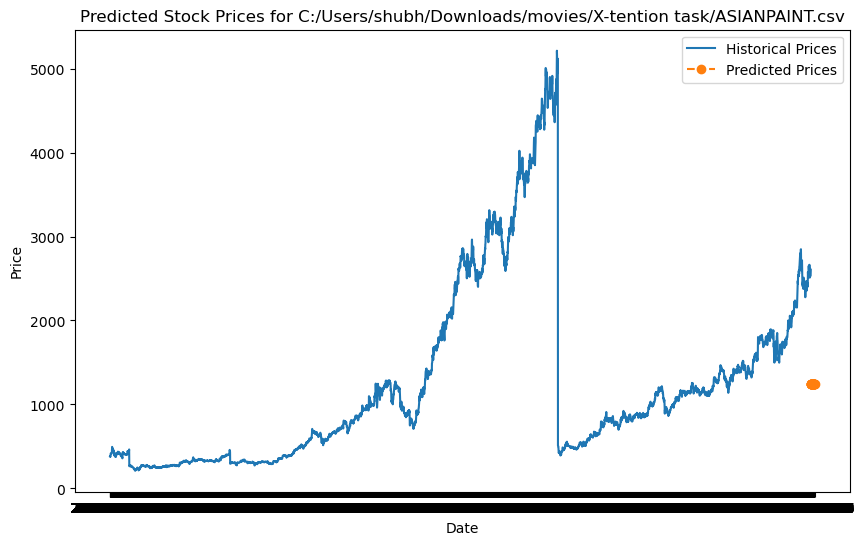

In [63]:
def find_matching_stock(stock_name, stock_list):
    matches = [stock for stock in stock_list if stock_name.lower() in stock.lower()]
    return matches[0] if matches else None

def predict_stock_prices(stock_name, stock_list, num_days=30):
    
    matched_stock = find_matching_stock(stock_name, stock_list)
    # Load stock data
    stock_data = pd.read_csv(matched_stock)

    if matched_stock is None:
        return f"No matching stock found for '{stock_name}'."
    
    # Split data into features (X) and target (y)
    X = stock_data.drop(columns=['Date', 'Symbol', 'Series', 'Close'])
    y = stock_data['Close']

    # Handle missing values
    pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    X = stock_data.drop(columns=['Date', 'Symbol', 'Series', 'Close'])
    X= pipeline.fit_transform(X)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict future prices
    # Get the last available date in the dataset
    last_date = datetime.strptime(stock_data['Date'].iloc[-1], '%Y-%m-%d')

    # Generate future dates
    future_dates = [(last_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(1, num_days+1)]

    X=pd.DataFrame(X)
    # Generate future features based on the last available data
    future_features = pd.DataFrame(columns=X.columns, index=future_dates)
    future_features = future_features.fillna(X.mean())
    
    # Predict future prices
    future_prices = model.predict(future_features)
    
    print("Predicted Stock Prices:")
    for date, price in zip(future_dates, future_prices):
        print(f"{date}: {price}")

    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Historical Prices')
    plt.plot(future_dates, future_prices, label='Predicted Prices', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted Stock Prices for {matched_stock}')
    plt.legend()
    plt.show()

# Example usage
stock_name=input('')
predict_stock_prices(stock_name, stock_list_file_paths, num_days=30)
